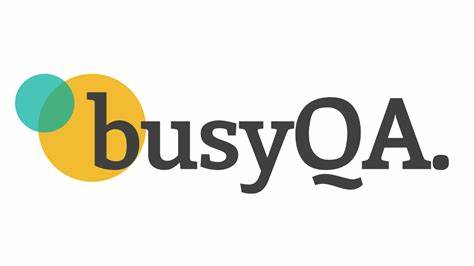

# HR Analystic Task 1

### Problem Statement:
BusyQA, a training institute specializing in analytics and data science, plans to venture into data science recruitment. With a significant influx of trainees, the company aims to connect them with clients seeking analytics professionals. Before making these connections, BusyQA wants to identify candidates actively seeking new job opportunities. Leveraging student information, including demographics, education, experience, and training features, the goal is to create a predictive model that assesses the likelihood of an enrollee looking for a new job

### Prepared by : Avani Patel

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
path = "C:/Users/avnip/OneDrive/Desktop/Data Analysis material/Busy QA Coop/"
file = "Train_Data.xlsx"
df = pd.read_excel(path+file)
df

,enrollee_id,city,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job,training_hours,target
0,23798,city_149,0.689,Male,Has relevent experience,no_enrollment,Graduate,STEM,3,100-500,Pvt Ltd,1,106,0
1,29166,city_83,0.923,Male,Has relevent experience,no_enrollment,Graduate,STEM,14,<10,Funded Startup,1,69,0
2,46,city_16,0.910,NaN,Has relevent experience,no_enrollment,Graduate,STEM,6,50-99,Public Sector,2,4,0
3,18527,city_64,0.666,Male,Has relevent experience,no_enrollment,Graduate,STEM,14,50-99,Pvt Ltd,1,26,0
4,21751,city_100,0.887,NaN,No relevent experience,no_enrollment,Masters,STEM,8,NaN,NaN,2,88,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18354,25366,city_103,0.920,Male,Has relevent experience,Full time course,Graduate,STEM,5,<10,Pvt Ltd,1,71,0
18355,25545,city_160,0.920,Male,No relevent experience,no_enrollment,Graduate,Humanities,15,50-99,Pvt Ltd,1,160,0
18356,11514,city_114,0.926,Male,Has relevent experience,no_enrollment,Masters,STEM,11,50-99,Pvt Ltd,3,18,0
18357,1689,city_75,0.939,Male,Has relevent experience,no_enrollment,Graduate,STEM,>20,1949-10-01 00:00:00,Pvt Ltd,3,41,0


In [3]:
#understanding number of rows and columns
df.shape

(18359, 14)

In [4]:
# making a copy of the file
data_copy = df

In [5]:
#understanding columns names and datatype
data_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18359 entries, 0 to 18358
Data columns (total 14 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   enrollee_id             18359 non-null  int64  
 1   city                    18359 non-null  object 
 2   city_development_index  18359 non-null  float64
 3   gender                  14261 non-null  object 
 4   relevent_experience     18359 non-null  object 
 5   enrolled_university     18017 non-null  object 
 6   education_level         17902 non-null  object 
 7   major_discipline        15521 non-null  object 
 8   experience              18300 non-null  object 
 9   company_size            13580 non-null  object 
 10  company_type            13320 non-null  object 
 11  last_new_job            17992 non-null  object 
 12  training_hours          18359 non-null  int64  
 13  target                  18359 non-null  int64  
dtypes: float64(1), int64(3), object(10)
me

### Data Cleaning and Manipulation:

In [6]:
#Checking for missing/null values
data_copy.isna().sum()

enrollee_id                  0
city                         0
city_development_index       0
gender                    4098
relevent_experience          0
enrolled_university        342
education_level            457
major_discipline          2838
experience                  59
company_size              4779
company_type              5039
last_new_job               367
training_hours               0
target                       0
dtype: int64

In [7]:
#Dropping NA null values with zero string
data_copy = data_copy.dropna()

In [8]:
data_copy

,enrollee_id,city,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job,training_hours,target
0,23798,city_149,0.689,Male,Has relevent experience,no_enrollment,Graduate,STEM,3,100-500,Pvt Ltd,1,106,0
1,29166,city_83,0.923,Male,Has relevent experience,no_enrollment,Graduate,STEM,14,<10,Funded Startup,1,69,0
3,18527,city_64,0.666,Male,Has relevent experience,no_enrollment,Graduate,STEM,14,50-99,Pvt Ltd,1,26,0
5,13342,city_21,0.624,Female,Has relevent experience,no_enrollment,Graduate,Other,8,5000-9999,Pvt Ltd,2,34,0
6,11746,city_21,0.624,Male,Has relevent experience,no_enrollment,Graduate,STEM,6,10000+,Pvt Ltd,3,23,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18354,25366,city_103,0.920,Male,Has relevent experience,Full time course,Graduate,STEM,5,<10,Pvt Ltd,1,71,0
18355,25545,city_160,0.920,Male,No relevent experience,no_enrollment,Graduate,Humanities,15,50-99,Pvt Ltd,1,160,0
18356,11514,city_114,0.926,Male,Has relevent experience,no_enrollment,Masters,STEM,11,50-99,Pvt Ltd,3,18,0
18357,1689,city_75,0.939,Male,Has relevent experience,no_enrollment,Graduate,STEM,>20,1949-10-01 00:00:00,Pvt Ltd,3,41,0


In [9]:
#Checking for duplicates
data_copy.duplicated().sum()

0

In [10]:
data_copy.describe()

,enrollee_id,city_development_index,training_hours,target
count,9287.000000,9287.000000,9287.000000,9287.000000
mean,16786.807042,0.861111,65.123506,0.106708
std,9989.674531,0.100966,60.444234,0.308759
min,2.000000,0.448000,1.000000,0.000000
25%,8076.500000,0.847000,23.000000,0.000000
50%,16674.000000,0.913000,47.000000,0.000000
75%,25926.000000,0.920000,88.000000,0.000000
max,33380.000000,0.949000,336.000000,1.000000


In [11]:
#getting the list/ summary of categorical Columns
categorical = data_copy.dtypes[data_copy.dtypes == 'object'].index
print(categorical)

data_copy[categorical].describe()

Index(['city', 'gender', 'relevent_experience', 'enrolled_university',
       'education_level', 'major_discipline', 'experience', 'company_size',
       'company_type', 'last_new_job'],
      dtype='object')


,city,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job
count,9287,9287,9287,9287,9287,9287,9287,9287,9287,9287
unique,115,3,2,3,3,6,22,8,6,6
top,city_103,Male,Has relevent experience,no_enrollment,Graduate,STEM,>20,50-99,Pvt Ltd,1
freq,2685,8366,8133,7905,6418,8228,2107,2047,7018,3897


In [12]:
# Variable Description
# enrollee_id               Unique ID for enrollee
# city                      City code
# city_development_index    Developement index of the city (scaled)
# gender                    Gender
# relevent_experience       Relevent experience
# enrolled_university       Type of University course enrolled if any
# education_level           Education level
# major_discipline          Major discipline
# experience                Total experience in years
# company_size              No of employees in current employer's company
# company_type              Type of current employer
# last_new_job              Difference in years between previous job and current job
# training_hours            training hours completed
# target                    0 – Not looking for job change, 1 – Looking for a job change

In [13]:
#In order save memory space and increase coputation speed, deleting non needed colums:
del data_copy['enrollee_id']

In [14]:
#Checking unique values in each column
for column in data_copy.columns:
    unique_values = data_copy[column].unique()
    print(f'{column}:')
    print(f'    {", ".join(map(str, unique_values))}')
    print('-' * 40)

city:
    city_149, city_83, city_64, city_21, city_114, city_103, city_97, city_160, city_65, city_90, city_136, city_159, city_67, city_76, city_28, city_104, city_16, city_73, city_75, city_61, city_99, city_142, city_116, city_128, city_74, city_1, city_152, city_36, city_44, city_123, city_46, city_93, city_162, city_173, city_40, city_71, city_105, city_23, city_91, city_41, city_13, city_57, city_115, city_11, city_45, city_30, city_102, city_138, city_12, city_143, city_126, city_50, city_100, city_27, city_101, city_84, city_150, city_179, city_89, city_176, city_146, city_14, city_24, city_81, city_19, city_94, city_118, city_134, city_157, city_98, city_165, city_26, city_78, city_20, city_10, city_9, city_158, city_144, city_59, city_77, city_121, city_117, city_55, city_145, city_69, city_72, city_39, city_141, city_139, city_70, city_53, city_106, city_133, city_167, city_80, city_54, city_175, city_120, city_18, city_131, city_7, city_109, city_42, city_155, city_37, cit

In [15]:
# Replace '1949-10-01 00:00:00' by '10-49' in Company_Size column
data_copy['company_size']=data_copy['company_size'].astype(str)
data_copy['company_size']=data_copy['company_size'].replace('1949-10-01 00:00:00','10-49')
data_copy['company_size'].unique()

C:\Users\avnip\AppData\Local\Temp\ipykernel_1916\678836064.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_copy['company_size']=data_copy['company_size'].astype(str)
C:\Users\avnip\AppData\Local\Temp\ipykernel_1916\678836064.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_copy['company_size']=data_copy['company_size'].replace('1949-10-01 00:00:00','10-49')


array(['100-500', '<10', '50-99', '5000-9999', '10000+', '1000-4999',
       '500-999', '10-49'], dtype=object)

In [16]:
# Replace '<1' with 0 and '>20' with 21 in the 'experience' column
data_copy['experience'] = data_copy['experience'].replace({'<1': 0, '>20': 21})
data_copy['experience'].unique()

C:\Users\avnip\AppData\Local\Temp\ipykernel_1916\3950483993.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_copy['experience'] = data_copy['experience'].replace({'<1': 0, '>20': 21})


array([ 3, 14,  8,  6, 21,  4,  9, 15, 10, 16, 12,  5, 13, 11,  7, 19,  1,
        2, 17,  0, 18, 20], dtype=int64)

In [17]:
# Replace '>4' with 5 in the 'last_new_job' column
data_copy['last_new_job'] = data_copy['last_new_job'].replace({'>4': 5})
data_copy['last_new_job'].unique()

C:\Users\avnip\AppData\Local\Temp\ipykernel_1916\3393736362.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_copy['last_new_job'] = data_copy['last_new_job'].replace({'>4': 5})


array([1, 2, 3, 5, 'never', 4], dtype=object)

##### Uni-variate Analysis

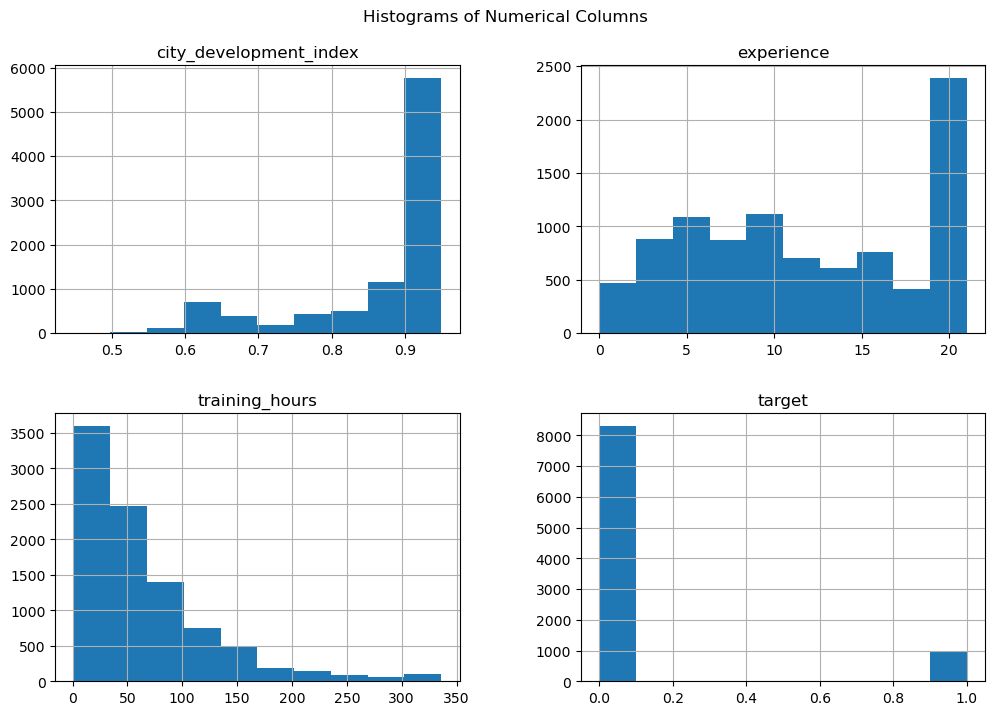

In [18]:
#understanding the skewness of the numerical columns

# Plot histograms for numerical columns
data_copy.hist(bins=10, figsize=(12, 8))
plt.suptitle('Histograms of Numerical Columns', y=0.95)
plt.show()

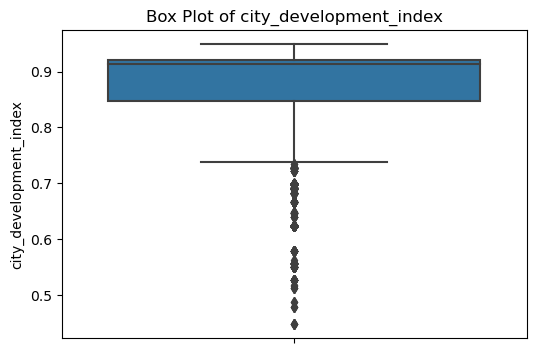

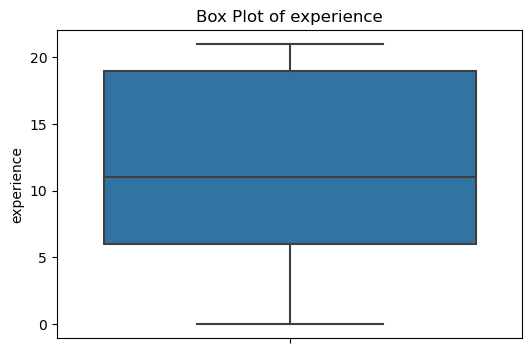

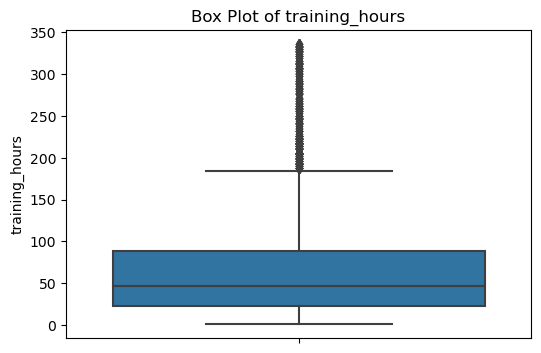

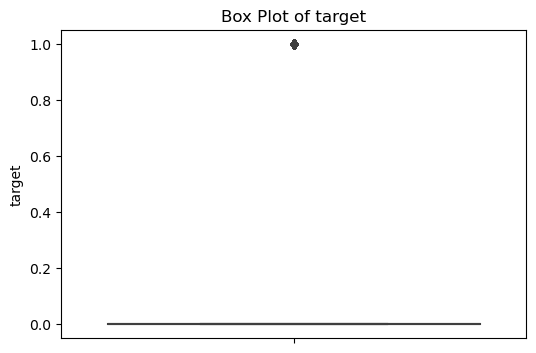

In [19]:
# outliers analysis
# Assuming data_copy is your DataFrame
# Create individual box plots for each numerical column
for column in data_copy.select_dtypes(include='number').columns:
    plt.figure(figsize=(6, 4))
    sns.boxplot(y=data_copy[column])
    plt.title(f'Box Plot of {column}')
    plt.show()

###### Bi-Variate Analysis

C:\Users\avnip\AppData\Local\Temp\ipykernel_1916\2897017235.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = data_copy.corr()


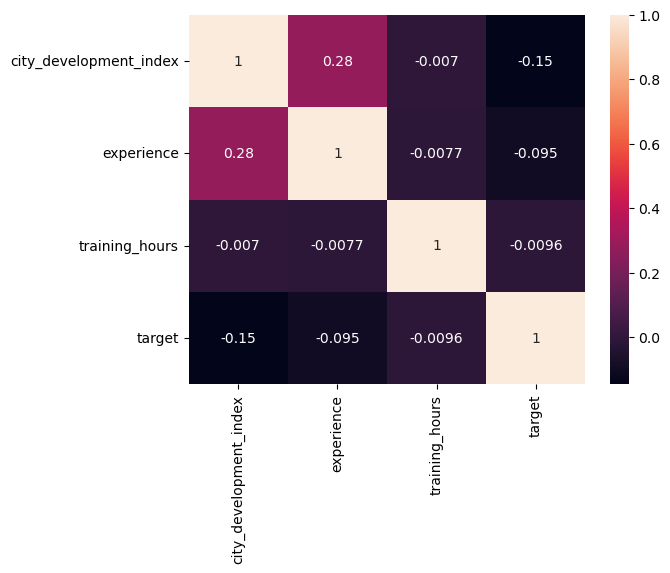

In [20]:
# Correlation matrix
correlation_matrix = data_copy.corr()

sns.heatmap(correlation_matrix, annot=True)
plt.show()


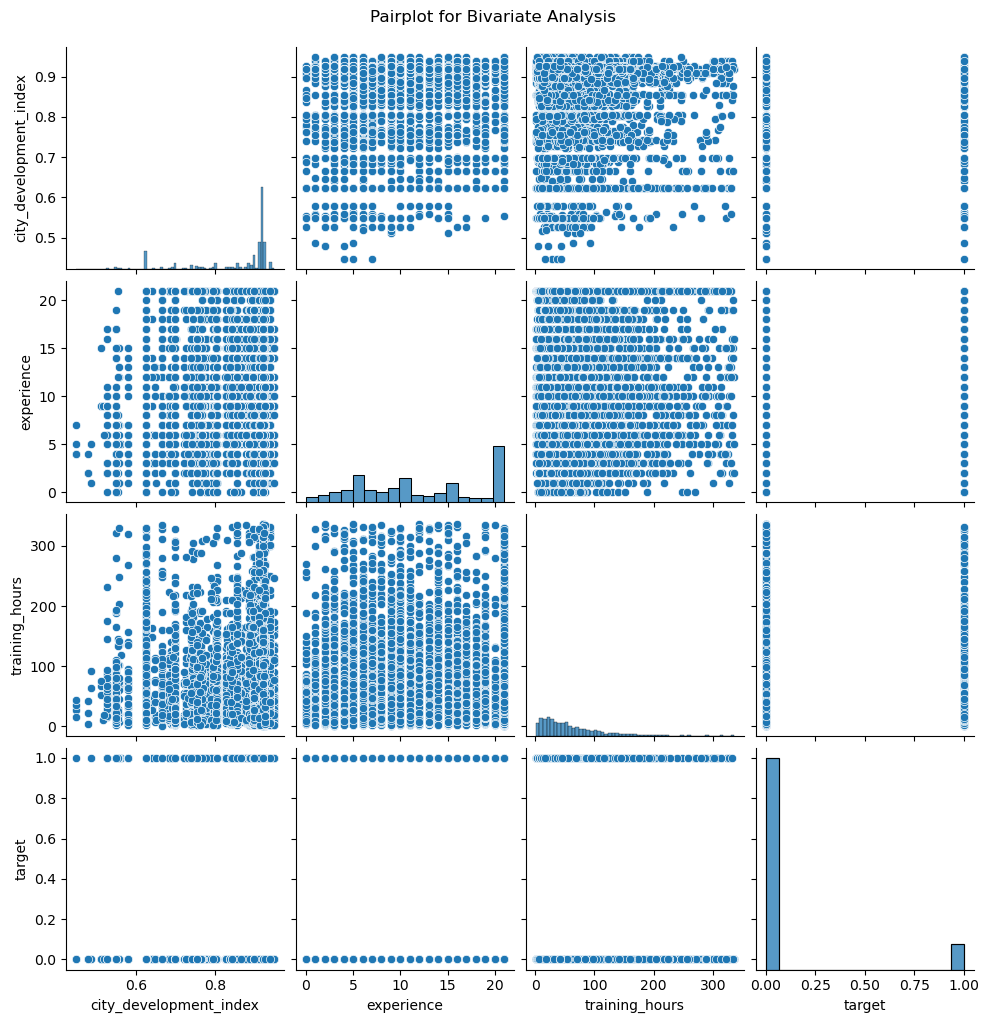

In [21]:
# Pairplot for bivariate analysis
sns.pairplot(data_copy)
plt.suptitle('Pairplot for Bivariate Analysis', y=1.02)
plt.show()

<Figure size 2000x1000 with 0 Axes>

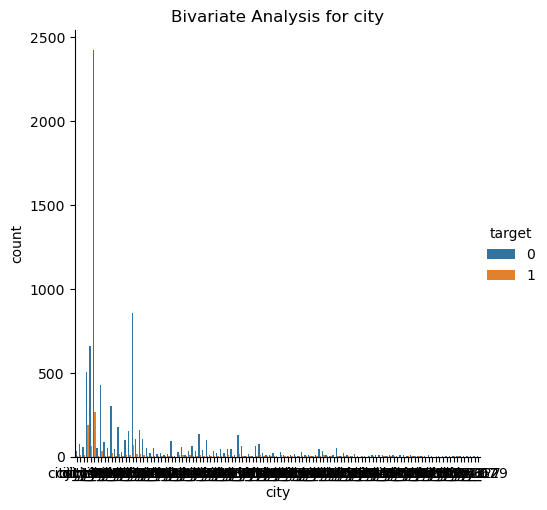

<Figure size 2000x1000 with 0 Axes>

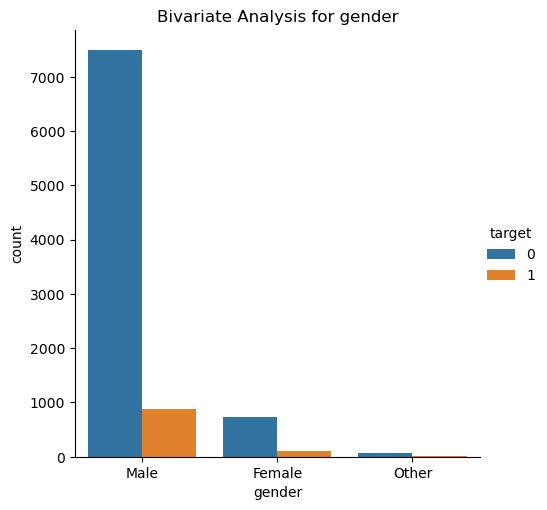

<Figure size 2000x1000 with 0 Axes>

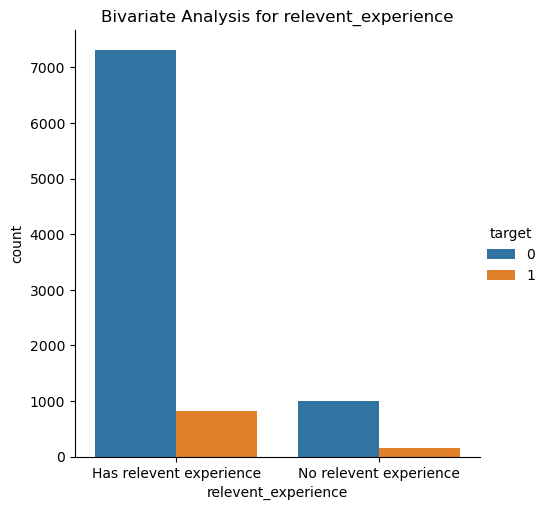

<Figure size 2000x1000 with 0 Axes>

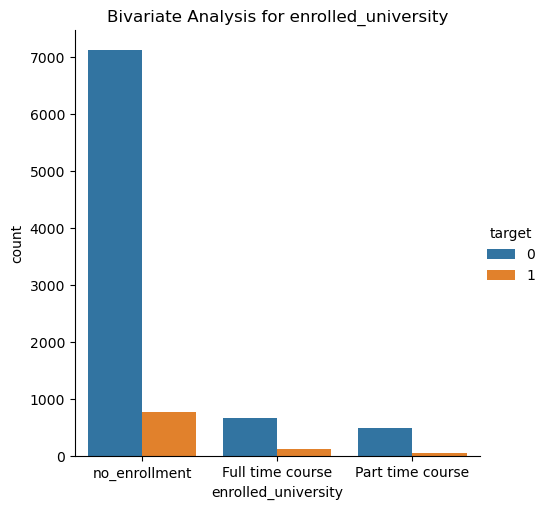

<Figure size 2000x1000 with 0 Axes>

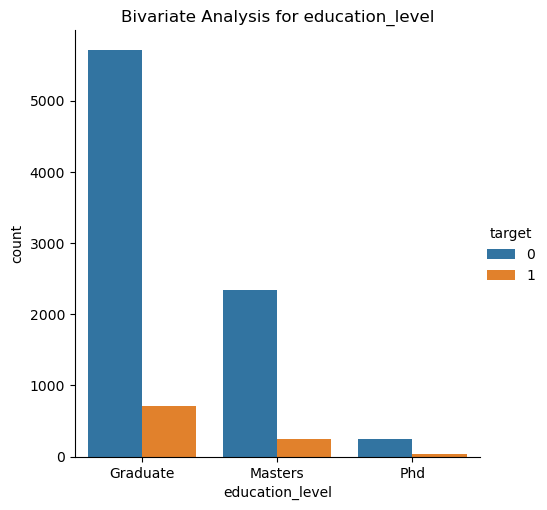

<Figure size 2000x1000 with 0 Axes>

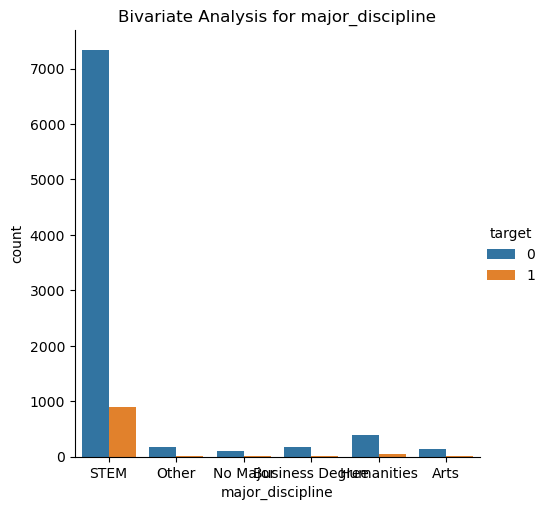

<Figure size 2000x1000 with 0 Axes>

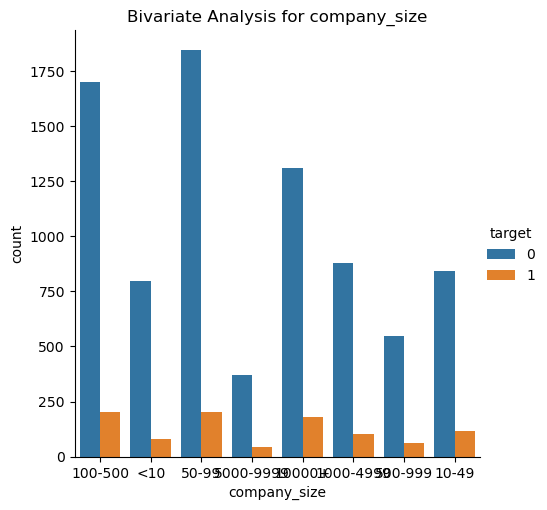

<Figure size 2000x1000 with 0 Axes>

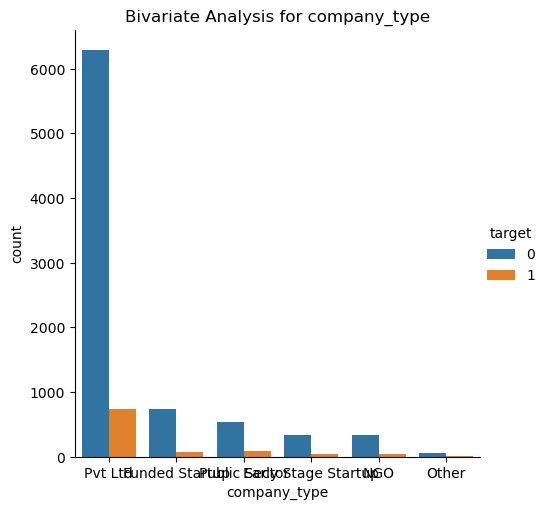

<Figure size 2000x1000 with 0 Axes>

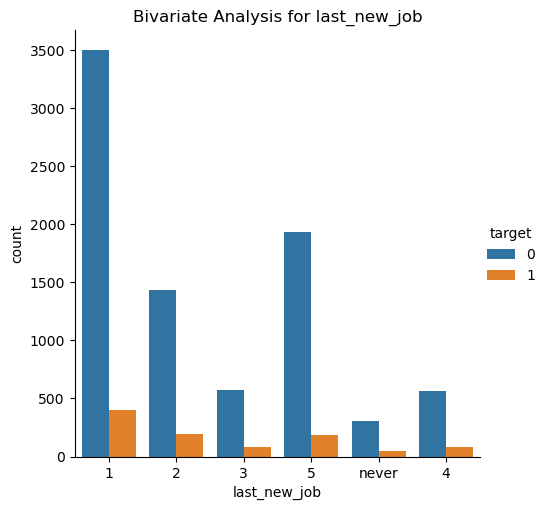

In [22]:
for column in data_copy.select_dtypes(include='object').columns:
    plt.figure(figsize=(20, 10))
    sns.catplot(x=column, hue='target', kind='count', data=data_copy)
    plt.title(f'Bivariate Analysis for {column}')
    plt.show()


### Analysis:

In [23]:
#we want to perform againd target column finding "who are looking for change = 1"

#modiying target column and using that data frame
data = data_copy[data_copy['target'] == 1]
data

,city,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job,training_hours,target
6,city_21,0.624,Male,Has relevent experience,no_enrollment,Graduate,STEM,6,10000+,Pvt Ltd,3,23,1
51,city_21,0.624,Male,No relevent experience,Full time course,Graduate,STEM,13,10-49,NGO,1,21,1
65,city_103,0.920,Male,Has relevent experience,no_enrollment,Graduate,Business Degree,21,10000+,Pvt Ltd,3,8,1
74,city_160,0.920,Male,Has relevent experience,no_enrollment,Graduate,Humanities,21,50-99,Pvt Ltd,5,33,1
81,city_160,0.920,Female,Has relevent experience,no_enrollment,Graduate,STEM,10,10-49,Pvt Ltd,4,101,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
18200,city_78,0.579,Male,Has relevent experience,no_enrollment,Graduate,STEM,11,50-99,Pvt Ltd,1,10,1
18262,city_91,0.691,Male,Has relevent experience,no_enrollment,Graduate,STEM,15,10-49,Pvt Ltd,1,45,1
18293,city_103,0.920,Female,No relevent experience,no_enrollment,Graduate,Humanities,3,100-500,Pvt Ltd,1,13,1
18315,city_70,0.698,Female,Has relevent experience,Full time course,Graduate,STEM,9,50-99,Pvt Ltd,1,95,1


Q1: Are males more inclined to looking for a new job as compared to females?

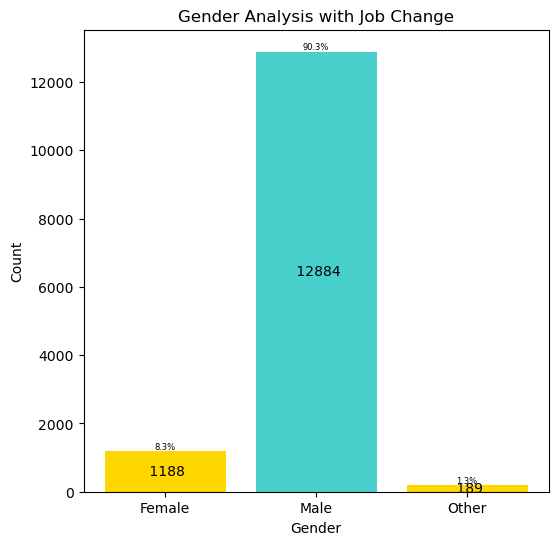

In [39]:
gender_analysis = gender_filtered.groupby(['gender', 'target']).size().unstack().reset_index()

# Calculate total count for each gender
gender_analysis['total'] = gender_analysis[0] + gender_analysis[1]

# Plotting the bar chart with total count and percentage annotations
fig, ax = plt.subplots(figsize=(6, 6))

# Find the index of the maximum value
max_index = gender_analysis['total'].idxmax()

# Plotting the bar chart with different colors for the maximum and other bars
bar_colors = ['gold' if i != max_index else 'mediumturquoise' for i in range(len(gender_analysis))]
bar_plot = ax.bar(gender_analysis['gender'], gender_analysis['total'], color=bar_colors)

ax.set_title('Gender Analysis with Job Change')
ax.set_xlabel('Gender')
ax.set_ylabel('Count')

# Adding total count annotations inside each bar
for i, p in enumerate(bar_plot):
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy() 
    ax.annotate(f' {height}', (x + width/2, y + height/2), ha='center', va='center', size=10)

# Adding percentage annotations above the bars
for i, p in enumerate(bar_plot):
    total_count = gender_analysis['total'].iloc[i]
    percent = (total_count / gender_analysis['total'].sum()) * 100
    ax.annotate(f'{percent:.1f}%', (p.get_x() + p.get_width() / 2, p.get_height()), ha='center', va='bottom', size=6)

plt.show()

###### Yes, 90% are the male enrollee's who are more inclined over looking to change.

Q2: Are private sector employees more inclined towards finding new jobs? 

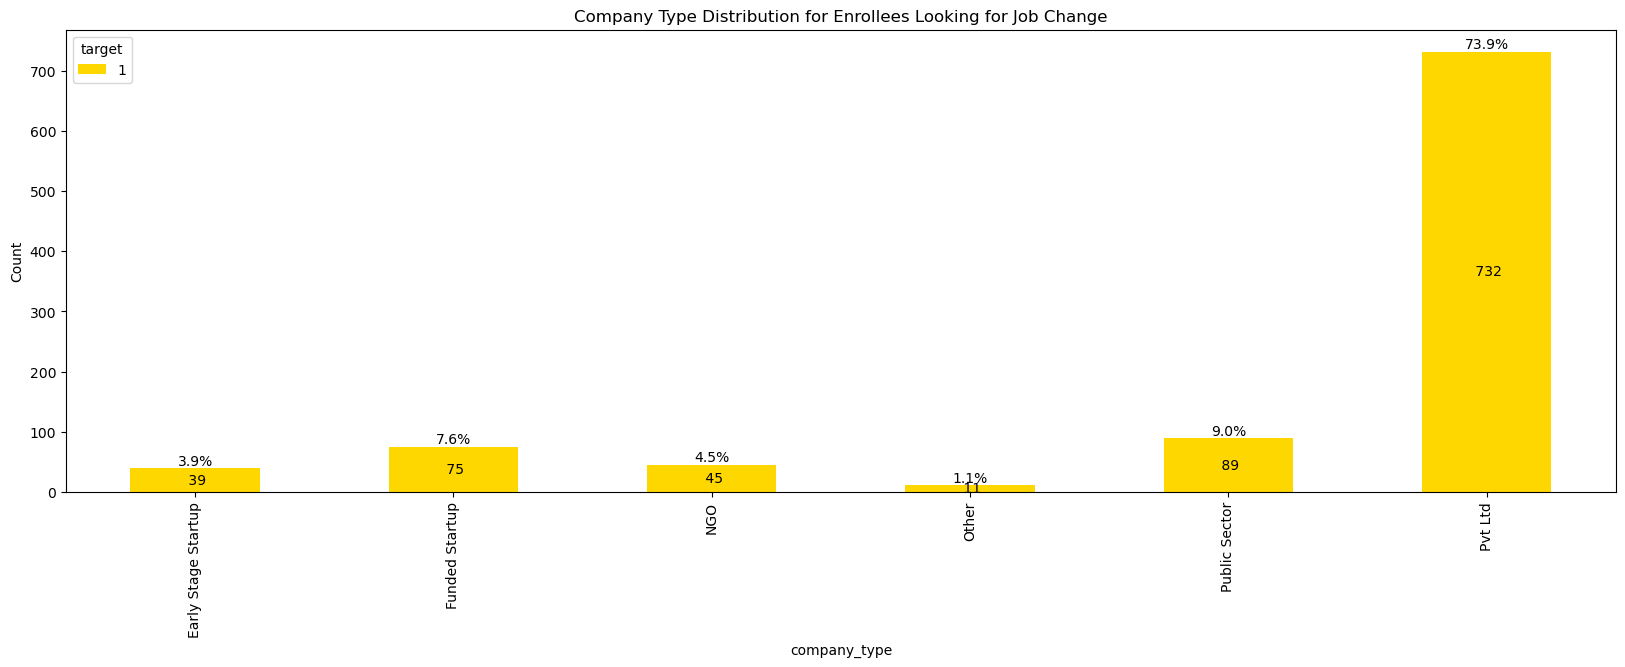

In [26]:
company_type_counts = data.groupby(['company_type', 'target']).size().unstack()

# Plotting the grouped bar chart with specified colors
fig, ax = plt.subplots(figsize=(20, 6))

# Find the index of the maximum value
max_index = company_type_counts.sum(axis=1).idxmax()

# Plotting the grouped bar chart with different colors for the maximum and other bars
bar_colors = ['gold' if i != max_index else 'mediumturquoise' for i in range(len(company_type_counts))]
ax = company_type_counts.plot(kind='bar', stacked=False, color=bar_colors, ax=ax)

# Adding total count annotations inside each bar
for p in ax.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy() 
    ax.annotate(f' {height}', (x + width/2, y + height/2), ha='center', va='center', size=10)
   
# Adding percentage annotations above the bars
for p in ax.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy() 
    total_count = height
    percent = (total_count / company_type_counts.sum().sum()) * 100
    ax.annotate(f'{percent:.1f}%', (x + width/2, y + height), ha='center', va='bottom', size=10)

ax.set_title('Company Type Distribution for Enrollees Looking for Job Change')
ax.set_xlabel('company_type')
ax.set_ylabel('Count')

plt.show()


###### Yes, Pvt sector employees has more churning count compared to others sectors. 7 in 10 are Private sector employee looking for new opportunity

Q3. Are enrolees with lower years of experience looking for a new job?

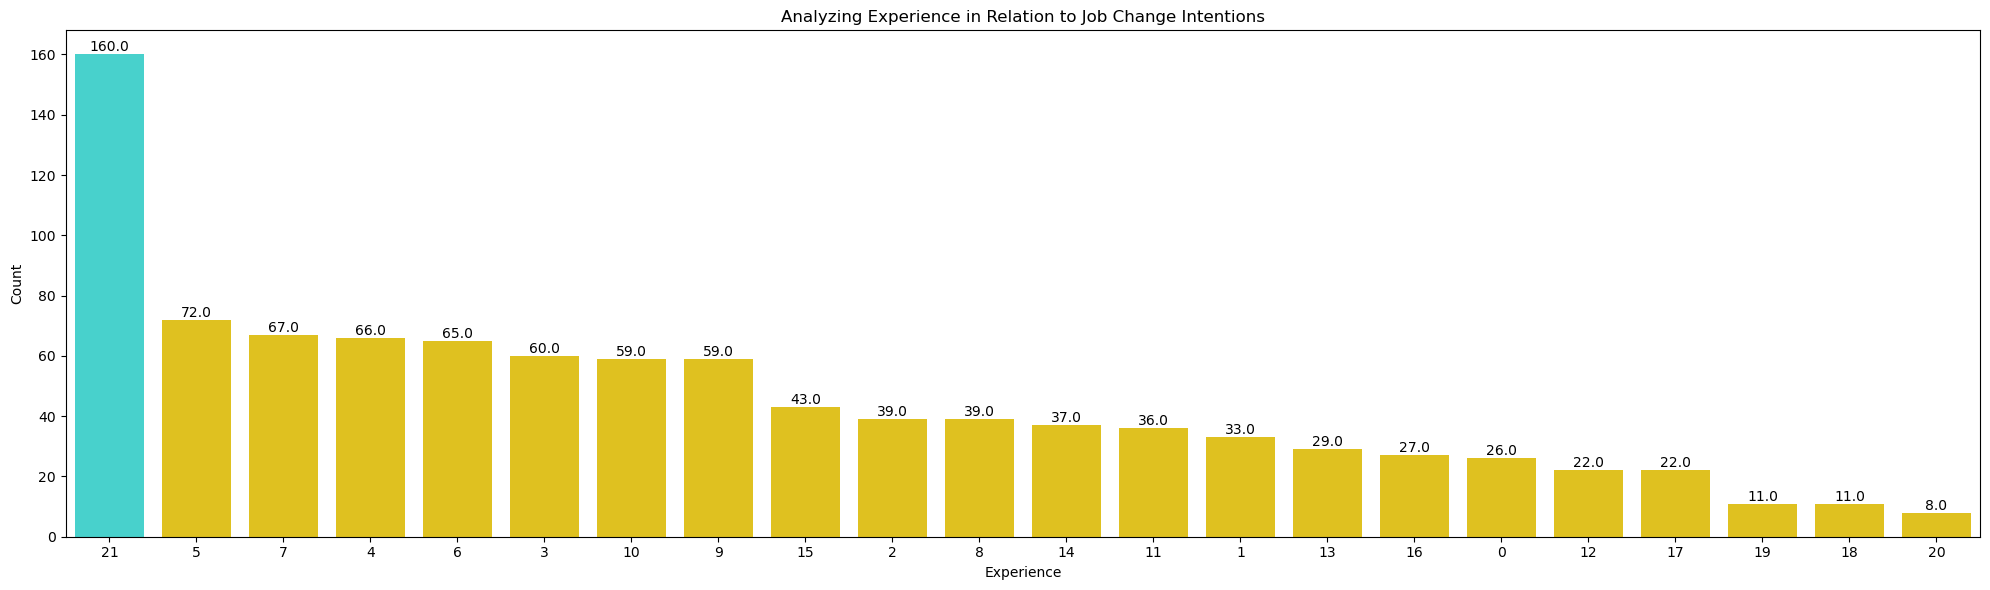

In [27]:
# Get the order of experience values in ascending order
experience_order = data['experience'].value_counts().index

# Create a figure with subplots
fig, ax = plt.subplots(figsize=(20, 6))

# Plotting the bar chart with ascending order
ax2 = sns.countplot(x='experience', data=data, order=experience_order, color='gold')

# Highlight the bar with the maximum count in red
max_count_value = data['experience'].value_counts().idxmax()
max_count_bar = ax2.patches[experience_order.get_loc(max_count_value)]
max_count_bar.set_facecolor('mediumturquoise')

# Adding values on top of the bars
for p in ax2.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy() 
    ax2.annotate(f'{height}', (x + width/2, y + height), ha='center', va='bottom', size=10)

ax2.set_title('Analyzing Experience in Relation to Job Change Intentions')
ax2.set_xlabel('Experience')
ax2.set_ylabel('Count')

# Adjust layout for better spacing
plt.tight_layout()

# Show the plots
plt.show()


C:\Users\avnip\AppData\Local\Temp\ipykernel_1916\3854126259.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['experience'] = data['experience'].replace({'<1': 0.5, '>20': 21})
C:\Users\avnip\AppData\Local\Temp\ipykernel_1916\3854126259.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['experience_bin'] = pd.cut(data['experience'], bins=bin_edges, labels=bin_labels, right=True)


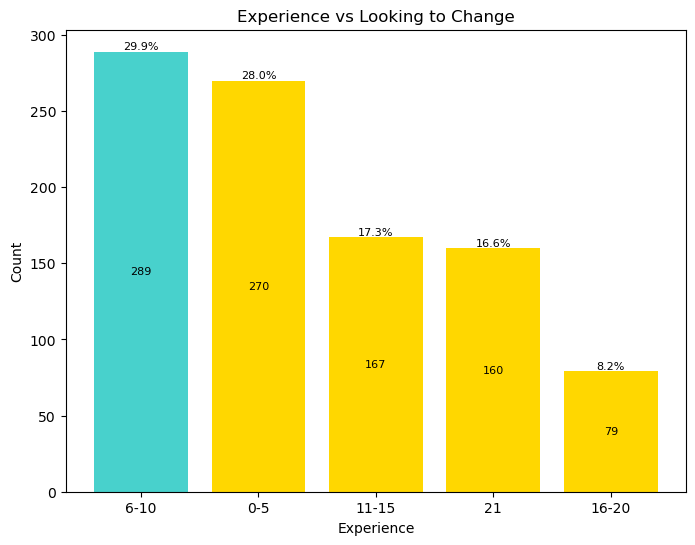

In [28]:
# Replace '<1' with 0.5 and '>20' with 21 in the 'experience' column
data['experience'] = data['experience'].replace({'<1': 0.5, '>20': 21})

# Define bin edges and labels
bin_edges = [0, 5, 10, 15, 20, 21]
bin_labels = ['0-5', '6-10', '11-15', '16-20', '21']

# Bin the 'experience' column
data['experience_bin'] = pd.cut(data['experience'], bins=bin_edges, labels=bin_labels, right=True)

# Get the order of experience values in ascending order
experience_order = data['experience_bin'].value_counts().index

# Count the occurrences based on 'experience_bin'
experience_counts = data['experience_bin'].value_counts()

# Creating subplots
fig, ax = plt.subplots(figsize=(8, 6))

# Plotting the bar chart with highest bar in 'mediumturquoise' and others in 'gold'
bar_colors = ['mediumturquoise' if val == experience_counts.idxmax() else 'gold' for val in experience_counts.index]
ax.bar(experience_counts.index, experience_counts, color=bar_colors)
ax.set_title('Experience vs Looking to Change')
ax.set_xlabel('Experience')
ax.set_ylabel('Count')

# Adding total value in the middle of the bars
for i, count in enumerate(experience_counts):
    ax.text(i, count/2, f'{count}', ha='center', va='center', size=8)

# Adding weight percentage annotations on top of the bars
for i, count in enumerate(experience_counts):
    ax.text(i, count + 0.1, f'{((count / experience_counts.sum()) * 100):.1f}%', ha='center', va='bottom', size=8)

plt.show()

######  From above 2 graphs, those who have 20yrs+ of experrience are looking for change, 60% of enrollees are between 0-10 yrs of experice can be potential targets.

Q4: Do enrolees looking for new jobs frequently change their jobs or spend considerable time in their last job? 

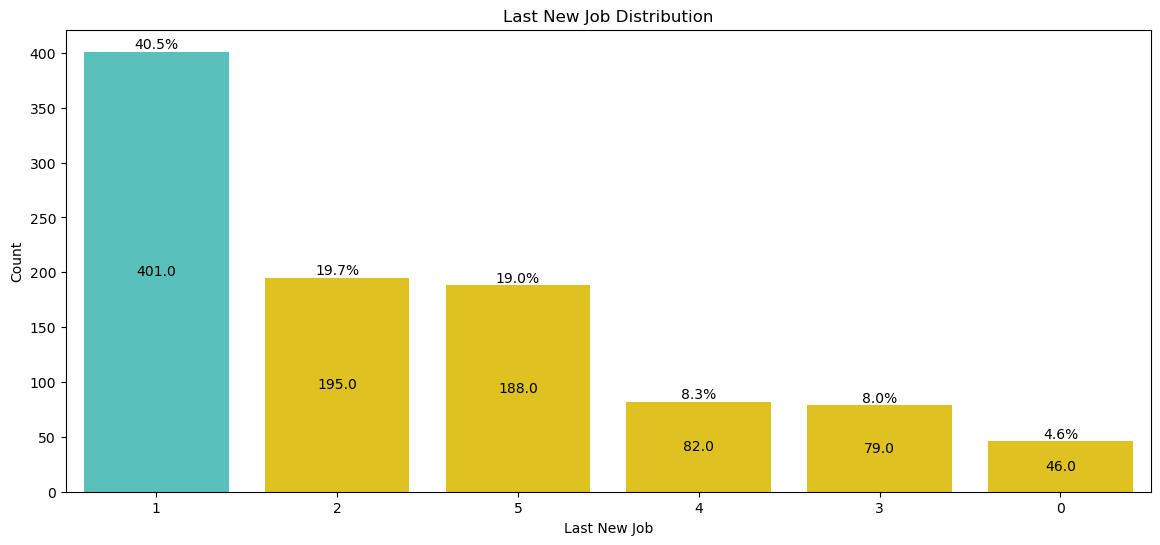

In [29]:
# Step 1: Remove rows where last_new_job is 'never'
data_lastjob_filtered = data['last_new_job'].replace({'never': 0})

# Plotting the bar chart for 'last_new_job'
plt.figure(figsize=(14, 6))

# Count occurrences for 'last_new_job'
last_new_job_counts = data_lastjob_filtered.value_counts()

# Calculate weight percentage
total_data = len(data_lastjob_filtered)
percentage_weights = (last_new_job_counts / total_data) * 100

# Get the order of values in ascending order
last_new_job_order = last_new_job_counts.index

# Plotting the bar chart with ascending order and specified colors
ax = sns.barplot(x=last_new_job_counts.index, y=last_new_job_counts.values, order=last_new_job_order, palette=['mediumturquoise' if val == last_new_job_counts.max() else 'gold' for val in last_new_job_counts])
ax.set_title('Last New Job Distribution')
ax.set_xlabel('Last New Job')
ax.set_ylabel('Count')

# Adding total value in the middle of the bars
for i, p in enumerate(ax.patches):
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy() 
    ax.annotate(f'{height}', (x + width/2, y + height/2), ha='center', va='center', size=10)

# Adding weight percentage annotations on top of the bars
for i, p in enumerate(ax.patches):
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy() 
    ax.annotate(f'{percentage_weights.iloc[i]:.1f}%', (x + width/2, y + height), ha='center', va='bottom', size=10)

plt.show()



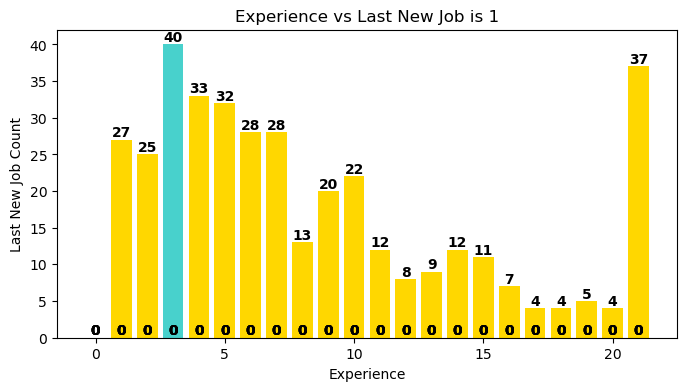

In [30]:
#Cleaning the column last_new_job, to under stand the pattern.
data_lastjob_filtered = data[data['last_new_job'].replace({'never': 0}) == 1]

new_df = data_lastjob_filtered.groupby(['experience', 'experience_bin'])['last_new_job'].sum().reset_index()

# Create a figure and axis
plt.figure(figsize=(8, 4))

# Bar Chart for 'experience'
plt.bar(new_df['experience'], new_df['last_new_job'], color=['mediumturquoise' if val == new_df['last_new_job'].max() else 'gold' for val in new_df['last_new_job']])

# Adding values on top of the bars
for x, y in zip(new_df['experience'], new_df['last_new_job']):
    plt.text(x, y, str(y), ha='center', va='bottom', size=10, weight='bold')

# Title and labels
plt.title('Experience vs Last New Job is 1')
plt.xlabel('Experience')
plt.ylabel('Last New Job Count')

# Show the plot
plt.show()


###### From this second chart, we can see the enrolles who have more the 4 years of experince with 1 last job are looking for change. These means enrolles dont change job very frequently, they definately tend to give time in a company. People who are fresher, tend to look for change more frequently. 

Q4. Are there any prominent cities where enrolees are more inclined to look for new job?

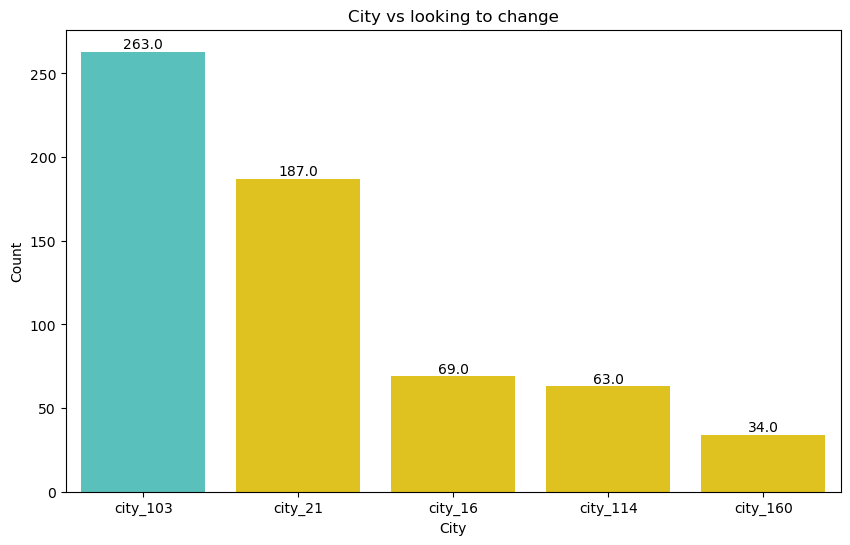

In [31]:
# Get the order of experience values in ascending order
city_order = data['city'].value_counts().nlargest(5).index

# Plotting the bar chart with ascending order
plt.figure(figsize=(10, 6))
ax = sns.countplot(x='city', data=data, order=city_order, palette=['mediumturquoise' if val == last_new_job_counts.max() else 'gold' for val in last_new_job_counts])

# Adding values on top of the bars
for p in ax.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy() 
    ax.annotate(f'{height}', (x + width/2, y + height), ha='center', va='bottom', size=10)

plt.title('City vs looking to change')
plt.xlabel('City')
plt.ylabel('Count')
plt.show()

###### why city_103 ?

In [32]:
data['city_development_index'].nunique()

68

In [33]:
data['city_development_index'] = (df['city_development_index'] * 100).round(0).astype(int)
data['city_development_index'].max()

C:\Users\avnip\AppData\Local\Temp\ipykernel_1916\2423688432.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['city_development_index'] = (df['city_development_index'] * 100).round(0).astype(int)


95

In [34]:
# Filter rows for city_103
city_103_data = data[data['city'] == 'city_103']

# Calculate the mean city_development_index for city_103
mean_dev_index_city_103 = city_103_data['city_development_index'].mean()

print(f"The mean city development index for city_103 is: {mean_dev_index_city_103}")


The mean city development index for city_103 is: 92.0


In [35]:
#lets see if there is a pattern behind changing the job in relation the city development index

import pandas as pd

# Assuming data is your DataFrame
bin_edges = [i for i in range(40, 101, 10)]
bin_labels = [f'{i}-{i+9}' for i in range(40, 100, 10)]

data['city_dev_index_bin'] = pd.cut(data['city_development_index'], bins=bin_edges, labels=bin_labels, right=False)

# Display the result
data[['city_development_index', 'city_dev_index_bin']]



C:\Users\avnip\AppData\Local\Temp\ipykernel_1916\78128764.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['city_dev_index_bin'] = pd.cut(data['city_development_index'], bins=bin_edges, labels=bin_labels, right=False)


,city_development_index,city_dev_index_bin
6,62,60-69
51,62,60-69
65,92,90-99
74,92,90-99
81,92,90-99
...,...,...
18200,58,50-59
18262,69,60-69
18293,92,90-99
18315,70,70-79


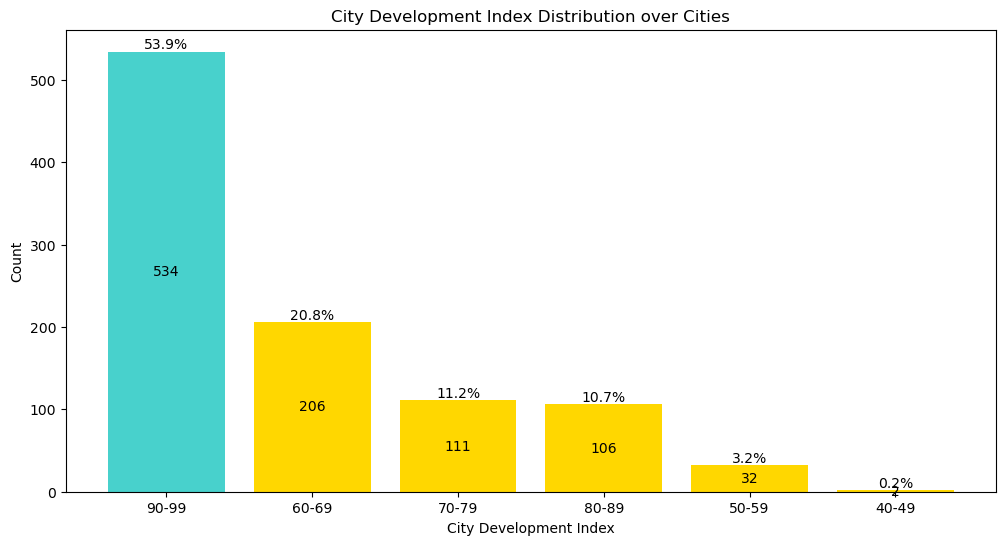

In [36]:
plt.figure(figsize=(12, 6))

all_city = data['city']

# Get the value counts for 'city_dev_index_bin'
city_dev_counts = data[data['city'].isin(all_city)]['city_dev_index_bin'].value_counts()

# Define colors based on the maximum count
colors = ['mediumturquoise' if val == city_dev_counts.idxmax() else 'gold' for val in city_dev_counts.index]

# Plotting the bar chart
bars = plt.bar(city_dev_counts.index, city_dev_counts.values, color=colors)

# Adding total value in the middle of the bars
for i, bar in enumerate(bars):
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval/2, f'{yval}', ha='center', va='center', fontsize=10)

# Adding weight percentage annotations on top of the bars
for i, bar in enumerate(bars):
    yval = bar.get_height()
    percent = (yval / city_dev_counts.sum()) * 100
    plt.text(bar.get_x() + bar.get_width()/2, yval + 0.05, f'{percent:.1f}%', ha='center', va='bottom', fontsize=10)

plt.title('City Development Index Distribution over Cities')
plt.xlabel('City Development Index')
plt.ylabel('Count')
plt.show()


###### As it was clear from the findings where, candidates from city_103 are more prominant in looking for job, but this can also be related to the city development index, where looking for job can relate to multiple factors.

Q6. Are non-STEM background enrolees are inclined for a new job? 

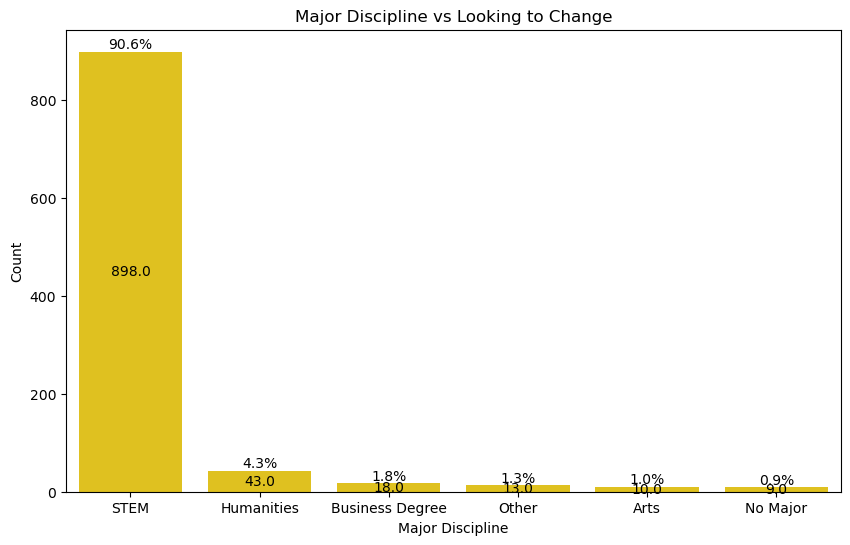

In [37]:
# Count the occurrences of each major discipline
major_discipline_counts = data['major_discipline'].value_counts()

# Plotting the bar chart with ascending order
plt.figure(figsize=(10, 6))
ax = sns.countplot(
    x='major_discipline',
    data=data,
    order=data['major_discipline'].value_counts().index,
    palette=['mediumturquoise' if val == major_discipline_counts.max() else 'gold' for val in data['major_discipline']])

# Adding total value in the middle of the bars
for i, p in enumerate(ax.patches):
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy()
    ax.annotate(f'{height}', (x + width/2, y + height/2), ha='center', va='center', size=10)

# Adding weight percentage annotations on top of the bars
for i, p in enumerate(ax.patches):
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy()
    total_count = height
    percent = (total_count / major_discipline_counts.sum()) * 100
    ax.annotate(f'{percent:.1f}%', (x + width/2, y + height), ha='center', va='bottom', size=10)

plt.title('Major Discipline vs Looking to Change')
plt.xlabel('Major Discipline')
plt.ylabel('Count')
plt.show()


###### no

Q7. Do enrolees looking for a new job spending high time in training?

C:\Users\avnip\AppData\Local\Temp\ipykernel_1916\3868723806.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['training_hours_bin'] = pd.cut(data['training_hours'], bins=bin_edges, labels=bin_labels, right=False)


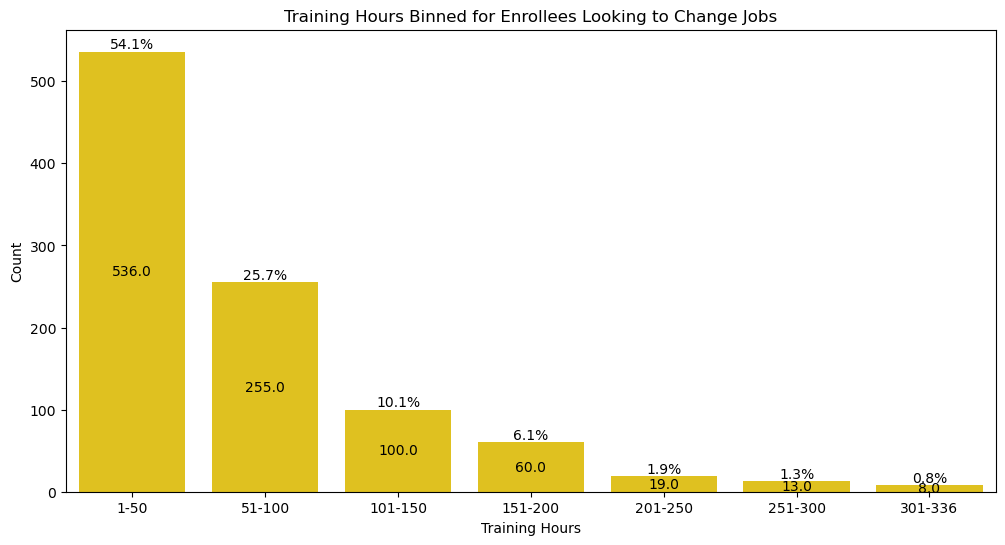

In [38]:
# Define the bin edges
bin_edges = [1, 50, 100, 150, 200, 250, 300, 336]

# Create bin labels
bin_labels = ['1-50', '51-100', '101-150', '151-200', '201-250', '251-300', '301-336']

# Apply binning to the 'training_hours' column in df_looking_for_job
data['training_hours_bin'] = pd.cut(data['training_hours'], bins=bin_edges, labels=bin_labels, right=False)

# Plotting the bar chart
plt.figure(figsize=(12, 6))
ax = sns.countplot(x='training_hours_bin', data=data, palette=['mediumturquoise' if val == data['training_hours_bin'].max() else 'gold' for val in data['training_hours_bin']])

# Adding total value in the middle of the bars
for i, p in enumerate(ax.patches):
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy() 
    ax.annotate(f'{height}', (x + width/2, y + height/2), ha='center', va='center', size=10)

# Adding weight percentage annotations on top of the bars
for i, p in enumerate(ax.patches):
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy() 
    total_count = height
    percent = (total_count / len(data)) * 100
    ax.annotate(f'{percent:.1f}%', (x + width/2, y + height), ha='center', va='bottom', size=10)

plt.title('Training Hours Binned for Enrollees Looking to Change Jobs')
plt.xlabel('Training Hours')
plt.ylabel('Count')
plt.show()


#### Employees are spend less hours in training if they are looking for changing the job

Q8. Other specific insights that can help us understand the drivers for job change?

###### Based on the analysis, it's evident that individuals are more likely to seek job changes when they have less years of experience, fewer training hours, a background in technology, and minimal job exposure. This suggests a desire for stability and increased exposure.
###### Considering multiple factors, male candidates are highly motivated by a sense of responsibility and the prospect of a salary increase.
###### In light of this data, we recommend Busy QA to engage with enrollee's regularly to better understand their needs and concerns. BusyQA can target candiates with STEM background. At this point marketing in Developed cities and be highly efficient.